## Object Detection with ORB

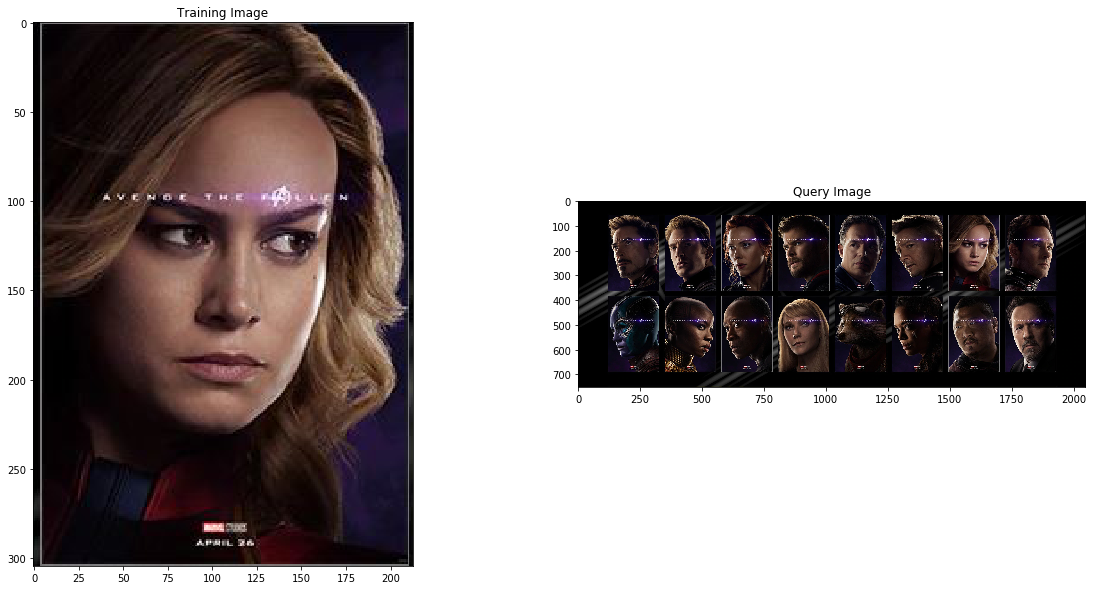

In [5]:
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

image1 = cv2.imread('cap2.jpg')
image2 = cv2.imread('cap1.jpg')

training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

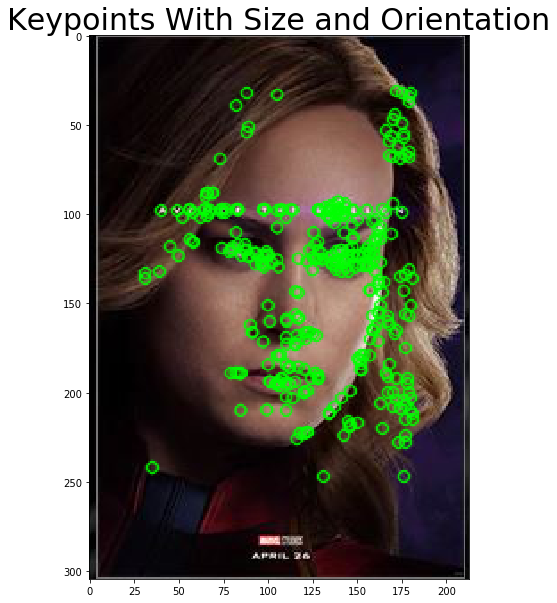


Number of keypoints Detected:  5551


In [2]:
import copy
plt.rcParams['figure.figsize'] = [20.0, 10.0]

training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(6000, 1.6)
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

train_img_keyp = copy.copy(training_image)

cv2.drawKeypoints(training_image, keypoints_train, train_img_keyp,  color = (0, 255, 0))
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(train_img_keyp)
plt.show()
print("\nNumber of keypoints Detected: ", len(keypoints_query))

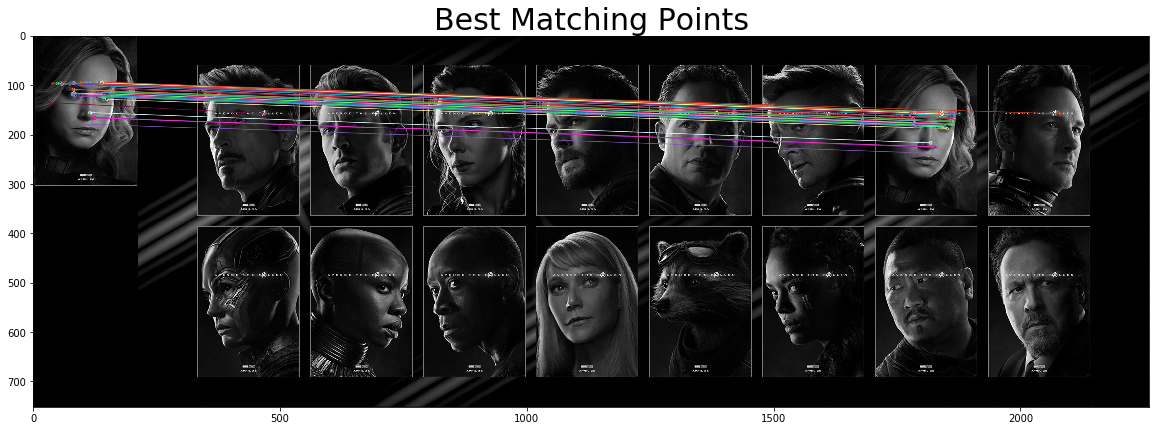

Number of Keypoints Detected In The Training Image:  339
Number of Keypoints Detected In The Query Image:  5551

Number of Matching Keypoints Between The Training and Query Images:  339


In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = False)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:60], query_gray, flags = 2)

plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))